In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
from datetime import *
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# Reading data from csv while parsing date column as datetime and index
mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")
stockData_df = pd.read_csv('spx.csv', infer_datetime_format=True, \
                          parse_dates=['date'], date_parser=mydateparser, index_col ="date")

<ipython-input-2-d87805aee600>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  mydateparser = lambda x: pd.datetime.strptime(x, "%d-%b-%y")


In [3]:
stockData_df.sample(5)

,close
date,
1991-07-26,380.93
1998-08-19,1098.06
2010-01-14,1148.46
2010-05-27,1103.06
1999-03-10,1286.84


In [4]:
print(stockData_df.iloc[0])
print(stockData_df.iloc[-1])

close    209.59
Name: 1986-01-02 00:00:00, dtype: float64
close    2718.37
Name: 2018-06-29 00:00:00, dtype: float64


In [5]:
# Taking latest complete one year data to ease coding
stockData_2017_df = stockData_df[(stockData_df.index.year == 2017)]

In [6]:
print(stockData_2017_df.shape)
print(stockData_2017_df)

(251, 1)
              close
date               
2017-01-03  2257.83
2017-01-04  2270.75
2017-01-05  2269.00
2017-01-06  2276.98
2017-01-09  2268.90
...             ...
2017-12-22  2683.34
2017-12-26  2680.50
2017-12-27  2682.62
2017-12-28  2687.54
2017-12-29  2673.61

[251 rows x 1 columns]


In [7]:
given_date = stockData_2017_df.index[0] + relativedelta(months=2)
print(given_date)

2017-03-03 00:00:00


In [8]:
#Check if the date is in dataframe or not
def Get_Valid_Date(given_date,df):
    if given_date>df.index[-1]:
        return df.index[-1].date()
    elif given_date<df.index[0]:
        return df.index[0].date()
    elif given_date in df.index:
        return given_date.date()
    else:
        reduced_date = given_date - timedelta(days=1)
        return Get_Valid_Date(reduced_date,df)

In [9]:
print(given_date)
checked_date=Get_Valid_Date(given_date,stockData_2017_df)
checked_date

2017-03-03 00:00:00


datetime.date(2017, 3, 3)

In [10]:
# Get closing value for the given date 
def Get_closing_Value(given_date,df):
    valid_date = str(Get_Valid_Date(given_date,df))
    day_close=df.loc[valid_date,["close"]]
    return day_close

In [11]:
Get_closing_Value(given_date,stockData_2017_df)

close    2383.12
Name: 2017-03-03 00:00:00, dtype: float64

In [12]:
# Calculate percentage growth when given date and dataframe
def Cal_per_growth(given_date, df):
    final_close=df.iloc[-1]
    #print(final_close)
    d_close=Get_closing_Value(given_date,df)
    return ((final_close-d_close)/d_close)*100 

In [13]:
Cal_per_growth(given_date,stockData_2017_df)

close    12.189483
dtype: float64

In [14]:
def months_count(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month + 1

In [15]:
def date_range(day_of_month, df):
    number_of_months = months_count(df.index[-1],df.index[0])
    #print(number_of_months)
    if day_of_month < df.index[0].day:
        first_date = datetime(int(df.index[0].year),int(df.index[0].month)+1,int(day_of_month))
        number_of_months -= 1
    else:
        first_date = datetime(int(df.index[0].year),int(df.index[0].month),int(day_of_month))
    
    if day_of_month > df.index[-1].day:
        number_of_months -= 1
        
    return [first_date + relativedelta(months=idx) for idx in range(number_of_months)]

In [16]:
date_range(30,stockData_2017_df)

[datetime.datetime(2017, 1, 30, 0, 0),
 datetime.datetime(2017, 2, 28, 0, 0),
 datetime.datetime(2017, 3, 30, 0, 0),
 datetime.datetime(2017, 4, 30, 0, 0),
 datetime.datetime(2017, 5, 30, 0, 0),
 datetime.datetime(2017, 6, 30, 0, 0),
 datetime.datetime(2017, 7, 30, 0, 0),
 datetime.datetime(2017, 8, 30, 0, 0),
 datetime.datetime(2017, 9, 30, 0, 0),
 datetime.datetime(2017, 10, 30, 0, 0),
 datetime.datetime(2017, 11, 30, 0, 0)]

In [17]:
# Calculate average growth of a given day of the month in the give dataframe
def Cal_avg_growth(day_of_month, df):
    growth=0
    count=0
    for date in date_range(day_of_month,df):
        growth += Cal_per_growth(date,df)
        count += 1
            
    avg_percent_growth=growth/count
    
    return avg_percent_growth

In [18]:
Cal_avg_growth(30,stockData_2017_df)

close    9.496895
dtype: float64

In [19]:
#Calculate average growth of all the days of the month in the give dataframe
def Cal_avg_growth_allDays(df):
    final= pd.DataFrame({'day': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]})
    final.set_index('day')
    result=[]
    for i in range(1,32):
        result.append(Cal_avg_growth(i, df))
    final["Average Growth"]=result
    return final

In [20]:
Result_table = Cal_avg_growth_allDays(stockData_df)
Result_table

,day,Average Growth
0,1,close 292.378119 dtype: float64
1,2,close 294.250776 dtype: float64
2,3,close 294.26732 dtype: float64
3,4,close 294.314572 dtype: float64
4,5,close 293.920868 dtype: float64
5,6,close 293.947527 dtype: float64
6,7,close 294.077802 dtype: float64
7,8,close 293.945627 dtype: float64
8,9,close 294.580902 dtype: float64
9,10,close 294.606243 dtype: float64


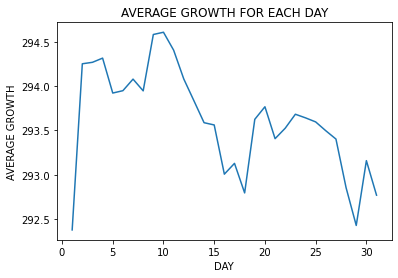

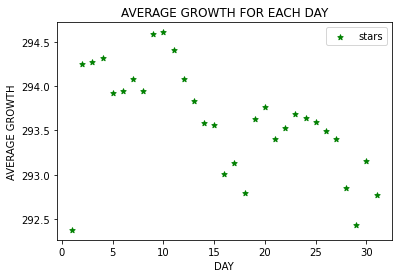

In [21]:
x=Result_table["day"]
y=Result_table["Average Growth"]
plt.plot(x, y)
plt.xlabel('DAY')
plt.ylabel('AVERAGE GROWTH')
plt.title('AVERAGE GROWTH FOR EACH DAY')
plt.show()
plt.scatter(x, y, label= "stars", color= "green", marker= "*", s=31)
plt.xlabel('DAY')
plt.ylabel('AVERAGE GROWTH')
plt.title('AVERAGE GROWTH FOR EACH DAY')
plt.legend()
plt.show()